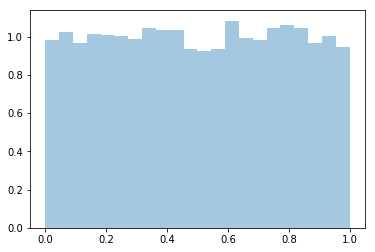

In [11]:
# https://twiecki.github.io/blog/2018/05/03/copulas/
%matplotlib inline

import numpy as np
import seaborn as sns
from scipy import stats

x = stats.uniform(0, 1).rvs(10000)
sns.distplot(x, kde=False, norm_hist=True);

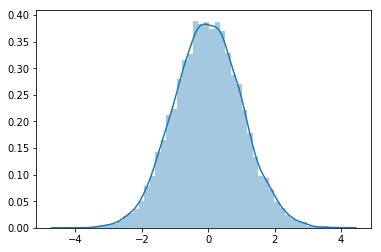

In [2]:
norm = stats.distributions.norm()
x_trans = norm.ppf(x)
sns.distplot(x_trans);

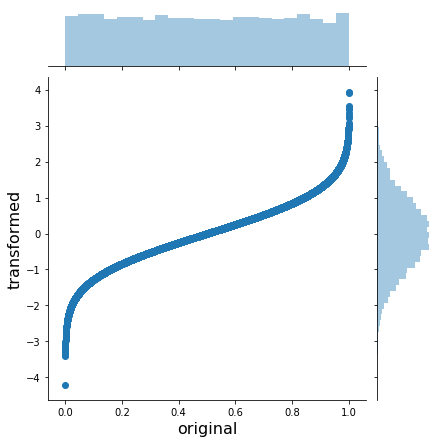

In [3]:
h = sns.jointplot(x, x_trans, stat_func=None)
h.set_axis_labels('original', 'transformed', fontsize=16);

# Gaussian copulas

Bivariate normal distribution: $\Phi_{\rho}(u, v)$, where $u$, $v$ are normally distributed, with correlation $\rho$.

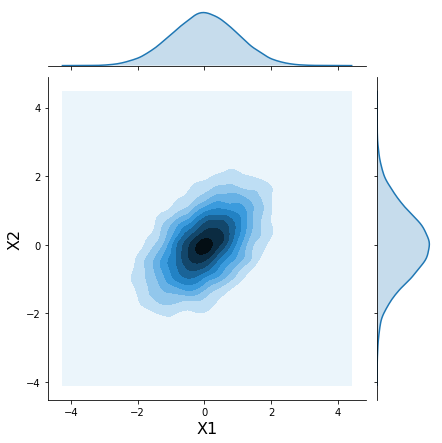

In [7]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=[[1., 0.5], 
                                                     [0.5, 1.]])
# Generate random samples from multivariate normal with correlation .5
x = mvnorm.rvs(10000)

h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);

Uniformify the marginals, i.e. $u \rightarrow x$ where $x = \phi^{-1}(u)$, and $x$ is uniformly distributed ($x \in {\rm Uniform}(0, 1)$).

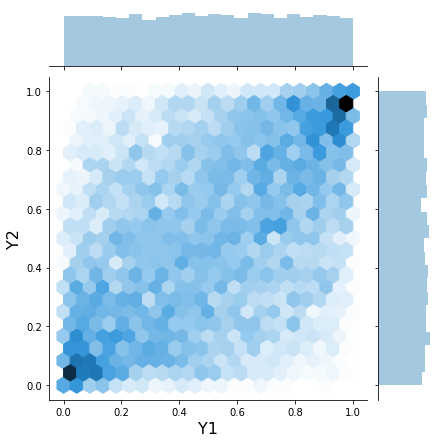

In [8]:
# 'Uniformifying' the marginals

norm = stats.norm()
x_unif = norm.cdf(x)
h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='hex', stat_func=None)
h.set_axis_labels('Y1', 'Y2', fontsize=16);

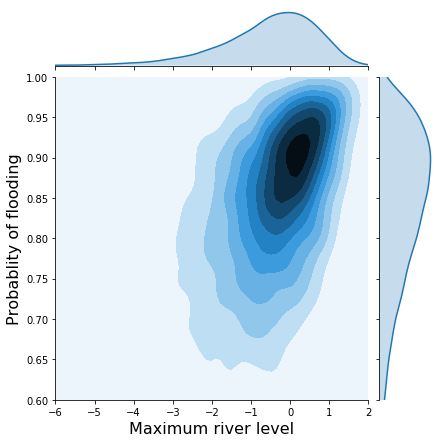

In [9]:
# Apply copula function, in this case a gumbel and beta distribution
m1 = stats.gumbel_l()
m2 = stats.beta(a=10, b=2)

x1_trans = m1.ppf(x_unif[:, 0])
x2_trans = m2.ppf(x_unif[:, 1])

h = sns.jointplot(x1_trans, x2_trans, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None)
h.set_axis_labels('Maximum river level', 'Probablity of flooding', fontsize=16)


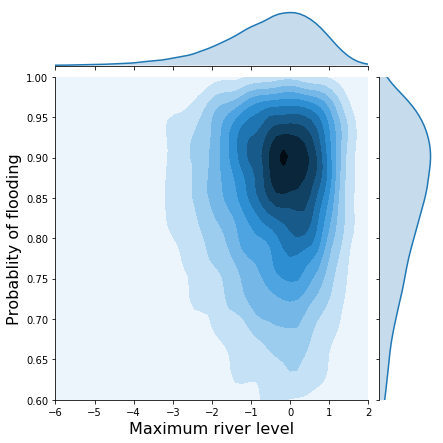

In [10]:
# Same jonit distribution without coupula

x1 = m1.rvs(10000)
x2 = m2.rvs(10000)

h = sns.jointplot(x1, x2, kind='kde', xlim=(-6, 2), ylim=(.6, 1.0), stat_func=None);
h.set_axis_labels('Maximum river level', 'Probablity of flooding',  fontsize=16);

In [13]:
# Joint distribution without copula has no correlation [(1, 0), (0, 1)],
# as expected for indepedent random variables.
np.corrcoef(x1, x2)

array([[1.        , 0.01375118],
       [0.01375118, 1.        ]])

In [14]:
# Joint distribution with copula preserves the correlation [(1, 0.5), (0.5, 1)]
np.corrcoef(x1_trans, x2_trans)

array([[1.        , 0.47922003],
       [0.47922003, 1.        ]])